# mfeat

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import dataset
### 1. mfeat-mor-left

In [2]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-mor-left')

Reading each data file line by line

In [3]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [4]:
mor_table = pd.DataFrame(columns=['class','mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])

In [5]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=['mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])
    mor_table = mor_table.append(temp_df, ignore_index = True)

In [6]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    mor_table.iloc[a:b,[0]] = x/160 - 1

In [7]:
mor_table['class'].value_counts()

9.0    160
8.0    160
7.0    160
6.0    160
5.0    160
4.0    160
3.0    160
2.0    160
1.0    160
0.0    160
Name: class, dtype: int64

In [8]:
mor_table = mor_table.astype({
    'class' : 'int8',    # category
    })

In [9]:
mor_table.head()

,class,mor1,mor2,mor3,mor4,mor5,mor6
0,0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,0,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,0,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,0,1.0,0.0,0.0,127.262861,1.329637,1647.720235
4,0,1.0,0.0,0.0,138.442861,1.379906,1918.750472


### 2. mfeat-zer-left

In [10]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-zer-left')

Reading each data file line by line

In [11]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [12]:
cols = []
for no in range(1, 48):
    cols.append('zer'+str(no))

In [13]:
zer_table = pd.DataFrame(columns=cols)

In [14]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    zer_table = zer_table.append(temp_df, ignore_index = True)

In [15]:
zer_table['class'] = pd.Series(0)

In [16]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    zer_table.iloc[a:b,[47]] = x/160 - 1

In [17]:
zer_table = zer_table.astype({'class' : 'int8'})

In [18]:
zer_table['class'].value_counts()

9    160
8    160
7    160
6    160
5    160
4    160
3    160
2    160
1    160
0    160
Name: class, dtype: int64

### 3. mfeat-zer-left

In [19]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-pix-left')

Reading each data file line by line

In [20]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [21]:
cols = []
for no in range(1, 241):
    cols.append('pix'+str(no))

In [22]:
pix_table = pd.DataFrame(columns=cols)

In [23]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    pix_table = pix_table.append(temp_df, ignore_index = True)

In [24]:
pix_table['class'] = pd.Series(0)

In [25]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    pix_table.iloc[a:b,[240]] = x/160 - 1

In [26]:
pix_table = pix_table.astype('int8')

In [27]:
pix_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 241 entries, pix1 to class
dtypes: int8(241)
memory usage: 376.7 KB


#### Note
3 tables available: `pix_table`, `zer_table`, `mor_table`

They can be connected on `class` column

## Data visualization

- create 2D numpy array for image

In [28]:
def get_image(num):
    if not(num >= 0 and num < 1600):
        return None
    x = 0
    img = np.zeros((16, 15))
    i = 0 
    while x < 240:
        a = x
        x += 15
        b = x   
        img[i] = pix_table.iloc[num,a:b].values
        i += 1
    return img

In [29]:
sample = get_image(1599)

In [30]:
sample

array([[0., 0., 1., 5., 6., 6., 6., 6., 6., 6., 6., 4., 3., 0., 0.],
       [0., 3., 6., 6., 6., 5., 2., 4., 6., 6., 6., 6., 6., 5., 0.],
       [3., 6., 6., 6., 3., 0., 0., 0., 0., 4., 6., 6., 6., 6., 0.],
       [2., 6., 6., 6., 0., 0., 0., 0., 0., 3., 6., 6., 6., 6., 1.],
       [0., 6., 6., 6., 0., 0., 0., 0., 0., 4., 6., 6., 6., 6., 2.],
       [0., 2., 6., 6., 5., 4., 4., 4., 5., 6., 6., 6., 6., 6., 0.],
       [0., 0., 1., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 2., 0.],
       [0., 0., 0., 0., 2., 2., 2., 2., 5., 6., 6., 6., 6., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 4., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 6., 6., 5., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 6., 6., 5., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 6., 6., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 6., 6., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 5., 6., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 6.

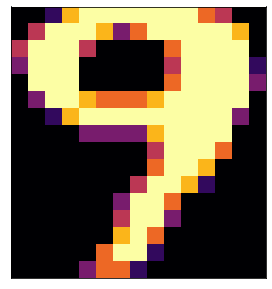

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.imshow(sample)


In [ ]:
forest = RandomForestClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Normalize data

### mor table

In [34]:
from sklearn import preprocessing

# don't scale 'class'
cols = mor_table.columns[1:]
df = pd.DataFrame(mor_table.iloc[:, 1:])


mor_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = mor_min_max_scaler.fit_transform(df)
mor_table_norm = pd.DataFrame(np_scaled, columns = cols)
mor_table_norm['class'] = mor_table['class']
mor_table_norm

,mor1,mor2,mor3,mor4,mor5,mor6,class
0,0.5,0.000000,0.0,0.158136,0.119067,0.011200,0
1,0.5,0.000000,0.0,0.103005,0.112746,0.010525,0
2,0.5,0.000000,0.0,0.141174,0.124250,0.008024,0
3,0.5,0.000000,0.0,0.107620,0.131742,0.012905,0
4,0.5,0.000000,0.0,0.203538,0.167250,0.029705,0
...,...,...,...,...,...,...,...
1595,0.5,0.166667,0.2,0.367028,0.362127,0.240908,9
1596,0.5,0.166667,0.2,0.323324,0.337088,0.235778,9
1597,0.5,0.166667,0.2,0.171194,0.281739,0.144256,9
1598,0.5,0.166667,0.2,0.242008,0.200078,0.166048,9


### zer table

In [35]:
# don't scale 'class'
cols = zer_table.columns[:47]
df = pd.DataFrame(zer_table.iloc[:, :47])

zer_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = zer_min_max_scaler.fit_transform(df)
zer_table_norm = pd.DataFrame(np_scaled, columns = cols)
# insert class
zer_table_norm['class'] = zer_table['class']
zer_table_norm

,zer1,zer2,zer3,zer4,zer5,zer6,zer7,zer8,zer9,zer10,...,zer39,zer40,zer41,zer42,zer43,zer44,zer45,zer46,zer47,class
0,0.020047,0.102600,0.215032,0.370950,0.597279,0.870073,0.445390,0.190564,0.193832,0.116014,...,0.209500,0.027292,0.043276,0.378609,0.353663,0.241635,0.088271,0.397238,0.476218,0
1,0.074991,0.145649,0.145805,0.202345,0.289732,0.745687,0.547263,0.049339,0.024287,0.118499,...,0.219565,0.237645,0.260938,0.407859,0.437710,0.201042,0.200728,0.387061,0.430761,0
2,0.083922,0.153130,0.113477,0.148771,0.180273,0.716714,0.841970,0.062231,0.066218,0.117717,...,0.118782,0.097273,0.309790,0.386920,0.505695,0.107736,0.117085,0.361180,0.499711,0
3,0.029798,0.074365,0.118557,0.176910,0.159124,0.816169,0.514863,0.069802,0.080012,0.100110,...,0.050604,0.097788,0.357556,0.457537,0.363829,0.037308,0.105152,0.446755,0.373107,0
4,0.135733,0.115134,0.425147,0.595234,0.520194,0.988880,0.143917,0.073899,0.165558,0.154022,...,0.170759,0.016150,0.072598,0.481330,0.267238,0.175287,0.045339,0.518281,0.414735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.035505,0.003611,0.054880,0.089915,0.473749,0.645896,0.179916,0.039868,0.007808,0.063798,...,0.230182,0.788217,0.248665,0.363406,0.463847,0.214790,0.697028,0.346284,0.393540,9
1596,0.049434,0.043758,0.112414,0.171519,0.213045,0.383600,0.230613,0.080567,0.071172,0.122083,...,0.046915,0.770640,0.286025,0.542446,0.397996,0.026525,0.737946,0.498316,0.351601,9
1597,0.046596,0.096663,0.136127,0.229589,0.240417,0.675636,0.165736,0.077938,0.137023,0.223603,...,0.142520,0.418486,0.243431,0.279128,0.407984,0.110649,0.461751,0.250253,0.237729,9
1598,0.018056,0.026422,0.013208,0.045131,0.277170,0.735883,0.081851,0.051258,0.087284,0.172836,...,0.437502,0.599872,0.132573,0.344875,0.615042,0.407019,0.577338,0.311001,0.546928,9


#### Feature importance

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = zer_table_norm.drop(columns=['class'], inplace=False)
y = zer_table_norm['class'].copy()

### pix table

In [38]:
# don't scale 'class'
cols = pix_table.columns[:240]
df = pd.DataFrame(pix_table.iloc[:, :240])

pix_min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = pix_min_max_scaler.fit_transform(df)
pix_table_norm = pd.DataFrame(np_scaled, columns = cols)

pix_table_norm['class'] = pix_table['class']

pix_table_norm

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239,pix240,class
0,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,...,1.00,1.00,1.00,1.00,0.75,0.0,0.00,0.00,0.0,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.500000,0.666667,0.666667,...,1.00,1.00,1.00,1.00,0.50,0.0,0.00,0.00,0.0,0
2,0.0,0.0,0.166667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.500000,...,0.75,1.00,1.00,1.00,1.00,1.0,0.50,0.25,0.0,0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,1.000000,1.000000,...,1.00,1.00,1.00,0.75,0.25,0.0,0.00,0.00,0.0,0
4,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,0.833333,0.666667,0.833333,...,1.00,1.00,1.00,1.00,1.00,1.0,0.75,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.000000,0.166667,0.500000,0.666667,0.833333,1.000000,0.666667,0.666667,...,1.00,1.00,1.00,1.00,1.00,1.0,0.00,0.00,0.0,9
1596,0.0,0.0,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00,1.00,0.75,0.00,0.00,0.0,0.00,0.00,0.0,9
1597,0.0,0.0,0.000000,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,...,0.50,1.00,1.00,1.00,0.25,0.0,0.00,0.00,0.0,9
1598,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.666667,0.833333,...,1.00,1.00,1.00,1.00,0.50,0.0,0.00,0.00,0.0,9


In [39]:
pix_table_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 241 entries, pix1 to class
dtypes: float64(240), int8(1)
memory usage: 2.9 MB


### Combine tables

Dropping 'class' columns except for the last table

In [40]:
combined = pd.concat([pix_table_norm.drop(columns=['class'], inplace=False), 
                      zer_table_norm.drop(columns=['class'], inplace=False), 
                      mor_table_norm], axis=1)

In [41]:
combined

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,zer45,zer46,zer47,mor1,mor2,mor3,mor4,mor5,mor6,class
0,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,...,0.088271,0.397238,0.476218,0.5,0.000000,0.0,0.158136,0.119067,0.011200,0
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.500000,0.666667,0.666667,...,0.200728,0.387061,0.430761,0.5,0.000000,0.0,0.103005,0.112746,0.010525,0
2,0.0,0.0,0.166667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.500000,...,0.117085,0.361180,0.499711,0.5,0.000000,0.0,0.141174,0.124250,0.008024,0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.666667,1.000000,1.000000,...,0.105152,0.446755,0.373107,0.5,0.000000,0.0,0.107620,0.131742,0.012905,0
4,0.0,0.5,0.666667,0.666667,1.000000,1.000000,1.000000,0.833333,0.666667,0.833333,...,0.045339,0.518281,0.414735,0.5,0.000000,0.0,0.203538,0.167250,0.029705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.000000,0.166667,0.500000,0.666667,0.833333,1.000000,0.666667,0.666667,...,0.697028,0.346284,0.393540,0.5,0.166667,0.2,0.367028,0.362127,0.240908,9
1596,0.0,0.0,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.737946,0.498316,0.351601,0.5,0.166667,0.2,0.323324,0.337088,0.235778,9
1597,0.0,0.0,0.000000,0.333333,0.666667,0.666667,0.666667,1.000000,0.666667,0.666667,...,0.461751,0.250253,0.237729,0.5,0.166667,0.2,0.171194,0.281739,0.144256,9
1598,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.666667,0.833333,...,0.577338,0.311001,0.546928,0.5,0.166667,0.2,0.242008,0.200078,0.166048,9


In [42]:
corr_matrix = combined.corr().round(2)

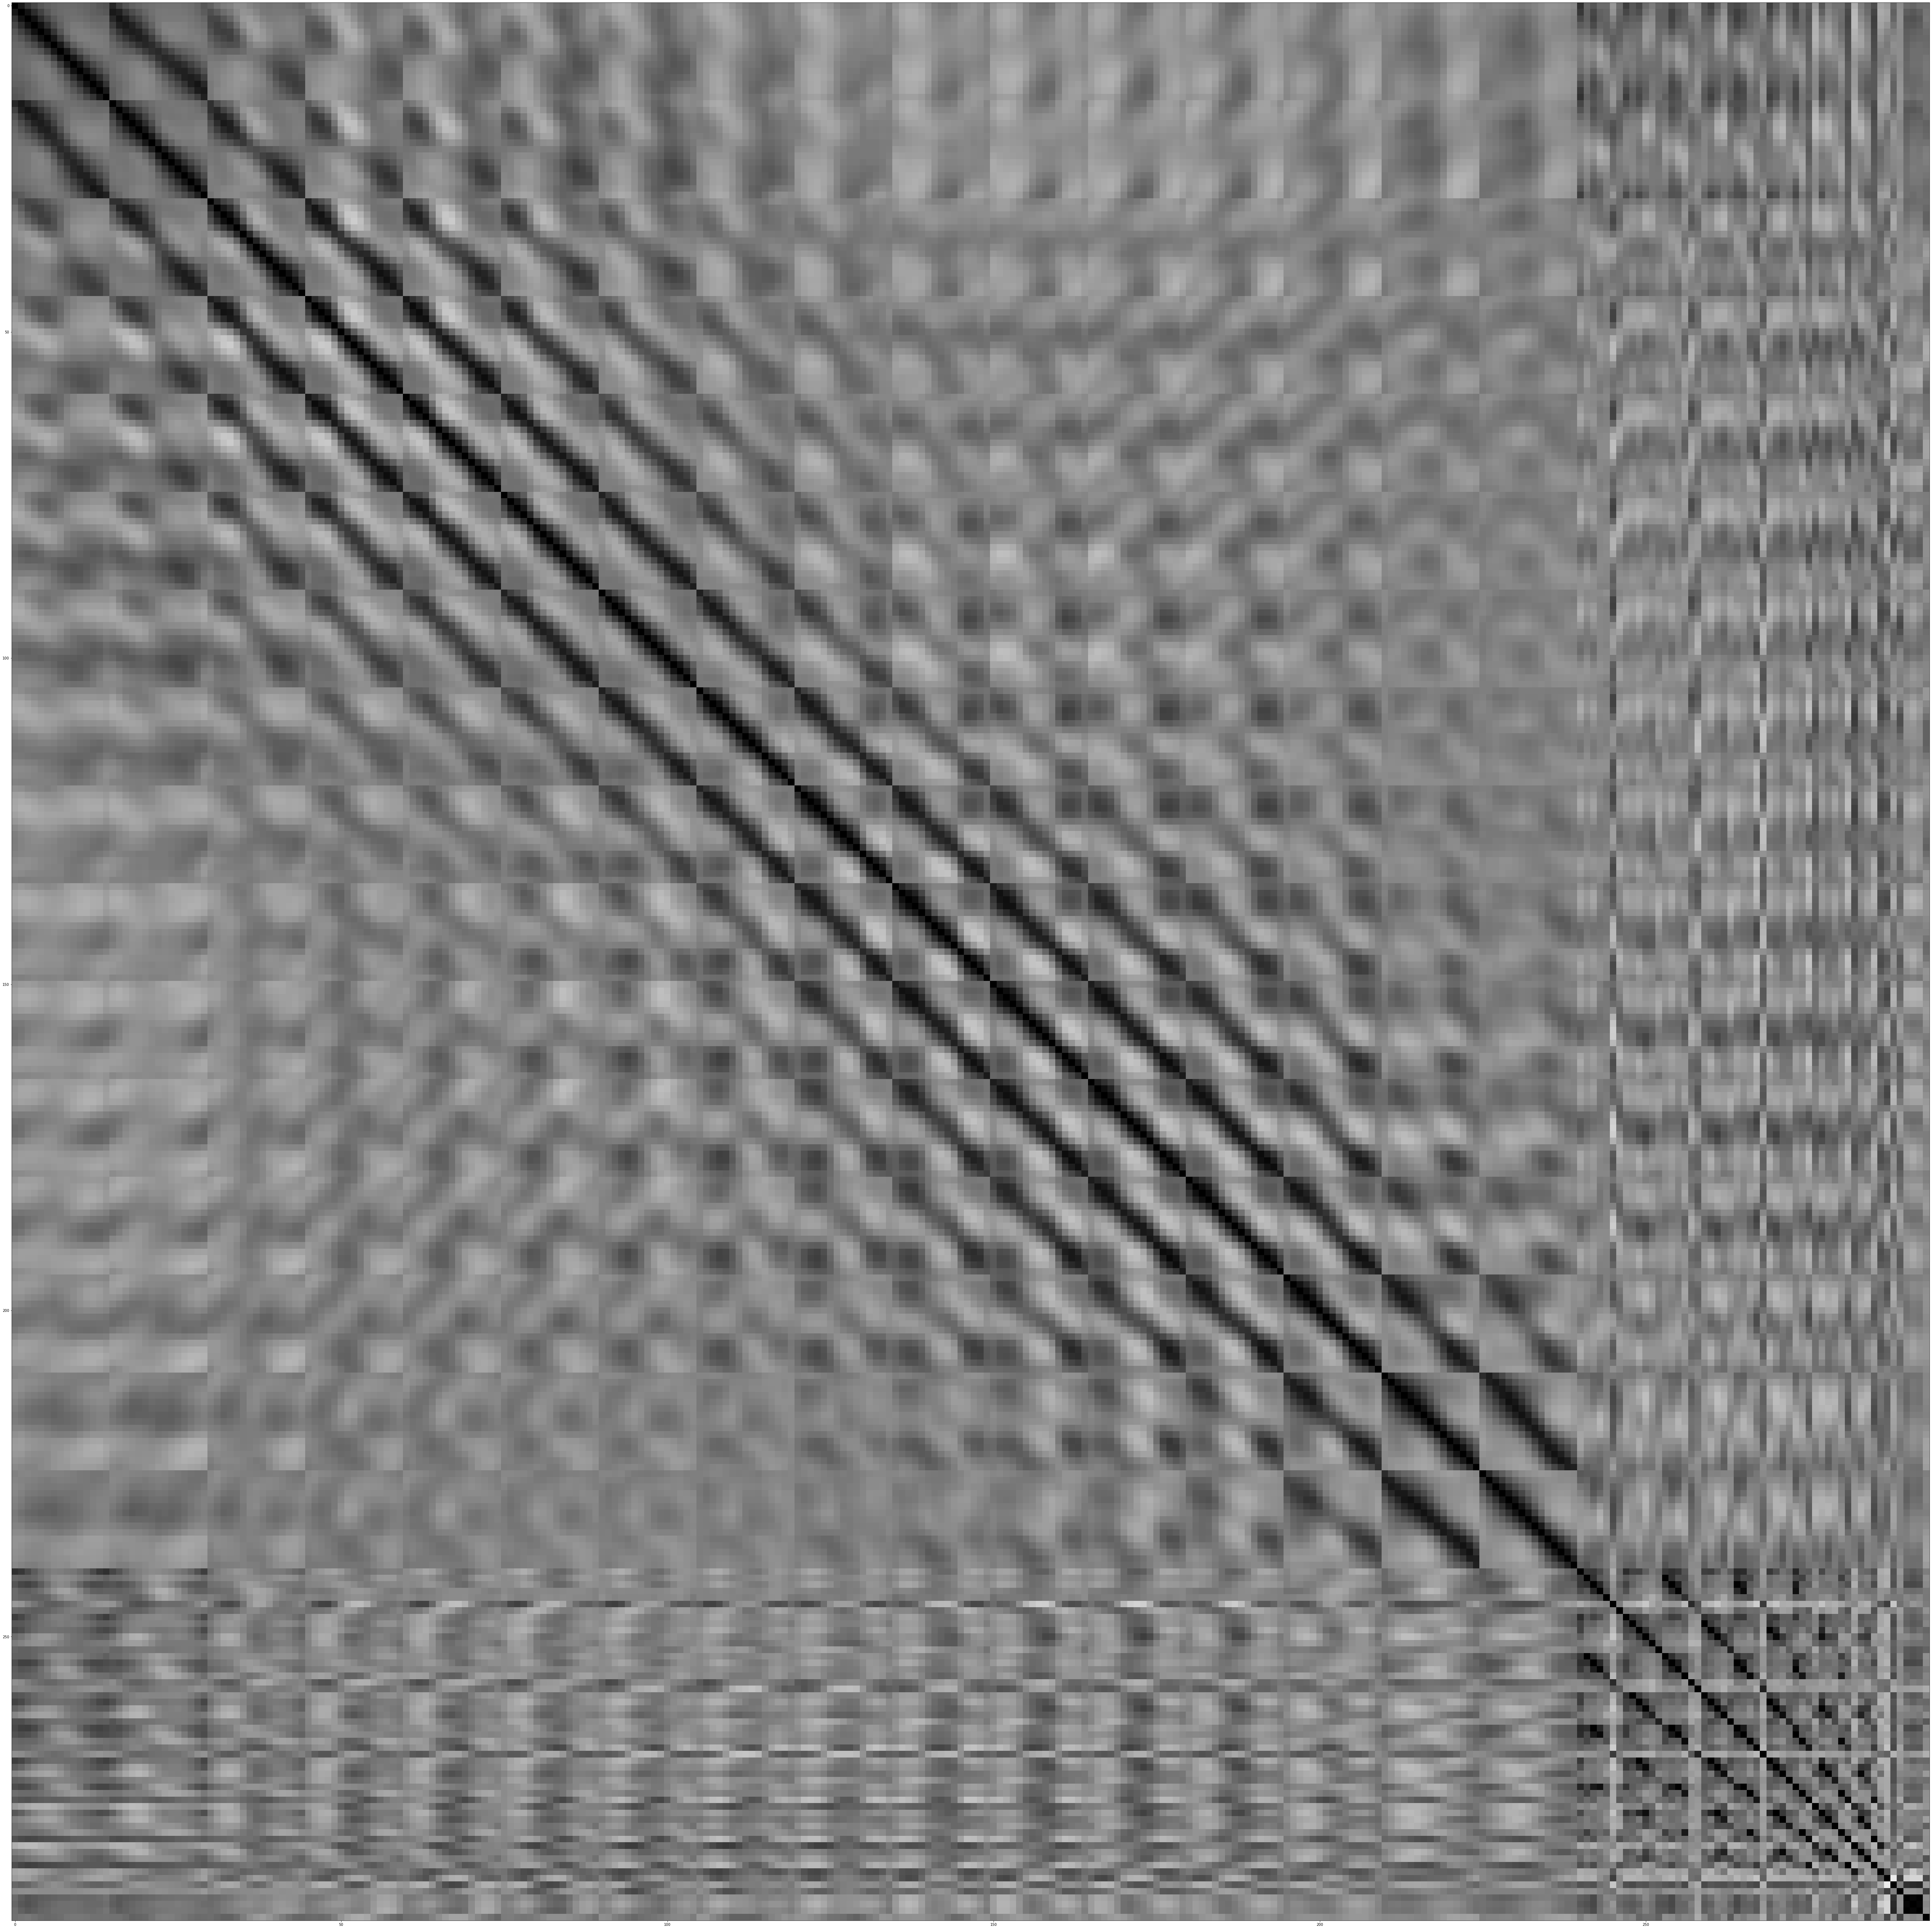

In [43]:
ig, ax = plt.subplots(figsize=(100,100))
# ig.set_figwidth(20)

im = ax.imshow(corr_matrix, cmap='binary', interpolation='nearest')
im.set_clim(-1, 1)
ax.grid(False)
plt.savefig('corr_matr.png')

### metrics

In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict

def metrics(clf, X, Y, t_x, t_y):
    pred = cross_val_predict(clf, X, Y, cv=3)
    y_pred = clf.predict(t_x)
    acc = accuracy_score(t_y, y_pred)
    f1 = f1_score(Y, pred, average="macro")
    print('Accuracy on test set: {:.4%}'.format(acc))
    print('F1: {:.4%}'.format(f1))
    print('Precision: {:.4%}'.format(precision_score(Y, pred, average="macro")))
    print('Recall: {:.4%}'.format(recall_score(Y, pred, average="macro")))
    return acc, f1

## Train models for each column (on normalized data)

In [45]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

def choose_best_clf(X_train, X_test, y_train, y_test):
    classifiers = [
        KNeighborsClassifier(),
        SVC(kernel="rbf", C=0.025, probability=True),
        NuSVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        GaussianProcessClassifier(),
        MultinomialNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        XGBClassifier()
        ]
    
    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)


    for clf in classifiers:
        name = clf.__class__.__name__
        try:
            clf.fit(X_train, y_train)
            print("="*30)
            print(name)
            print('****Results****')
#             train_predictions = clf.predict(X_test)
#             acc = accuracy_score(y_test, train_predictions)
#             print("Accuracy: {:.4%}".format(acc))
            acc, f1 = metrics(clf, X_train, y_train, X_test, y_test)
#             train_predictions = clf.predict_proba(X_test)
#             ll = log_loss(y_test, train_predictions)
#             print("Log Loss: {}".format(ll))

            log_entry = pd.DataFrame([[name, acc*100, f1*100]], columns=log_cols)
            log = log.append(log_entry)
        except ValueError:
            print("="*30, '\n')
            print(name, 'cannot be trained')

    print("="*30)
    plt.figure(figsize=(8,6))
    sns.set_color_codes("muted")
    sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
    
    plt.xlabel('Accuracy %')
    plt.title('Classifier Accuracy')
    plt.show()

    plt.figure(figsize=(8,6))
    sns.set_color_codes("muted")
    sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

    plt.xlabel('F1 Score')
    plt.title('Classifier F1 Score')
    plt.show()

### mor

dataset split

In [46]:

X = mor_table_norm.drop(columns=['class'], inplace=False)
y = mor_table_norm['class'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy on test set: 70.6250%
F1: 70.5124%
Precision: 70.9423%
Recall: 70.4934%
SVC
****Results****
Accuracy on test set: 63.1250%
F1: 53.4249%
Precision: 58.2186%
Recall: 61.8529%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NuSVC
****Results****
Accuracy on test set: 68.7500%
F1: 70.7818%
Precision: 71.4769%
Recall: 70.9569%
DecisionTreeClassifier
****Results****
Accuracy on test set: 63.1250%
F1: 65.9963%
Precision: 66.0364%
Recall: 66.0424%
RandomForestClassifier
****Results****
Accuracy on test set: 65.0000%
F1: 71.9798%
Precision: 72.0963%
Recall: 72.1121%
AdaBoostClassifier
****Results****
Accuracy on test set: 28.7500%
F1: 23.2867%
Precision: 38.6915%
Recall: 30.6371%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
****Results****
Accuracy on test set: 67.5000%
F1: 72.4831%
Precision: 72.6651%
Recall: 72.5556%
GaussianNB
****Results****
Accuracy on test set: 59.3750%
F1: 56.8506%
Precision: 58.3313%
Recall: 60.8256%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianProcessClassifier
****Results****
Accuracy on test set: 67.5000%
F1: 69.1478%
Precision: 70.4406%
Recall: 70.2976%
MultinomialNB
****Results****
Accuracy on test set: 56.8750%
F1: 58.7046%
Precision: 60.8489%
Recall: 62.2597%
LinearDiscriminantAnalysis
****Results****
Accuracy on test set: 72.5000%
F1: 74.1533%
Precision: 74.4994%
Recall: 74.2783%
QuadraticDiscriminantAnalysis
****Results****
Accuracy on test set: 11.2500%
F1: 4.6424%
Precision: 3.0208%
Recall: 10.0244%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/A

XGBClassifier
****Results****
Accuracy on test set: 66.8750%
F1: 70.9746%
Precision: 70.9627%
Recall: 71.0833%


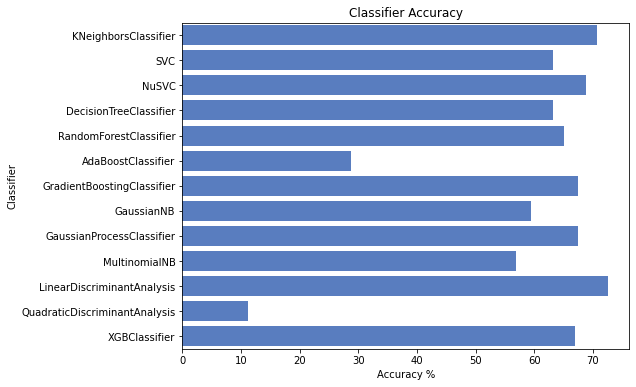

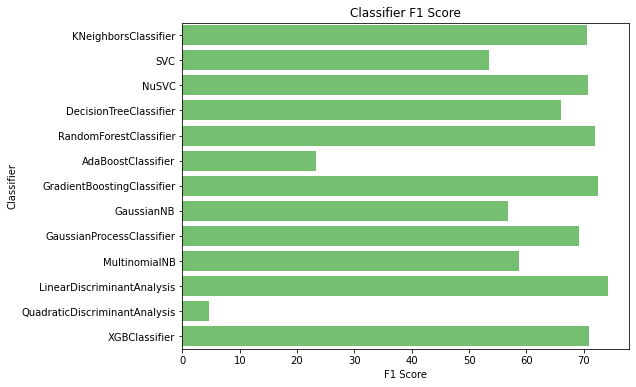

In [47]:
choose_best_clf(X_train, X_test, y_train, y_test)

### mor

dataset split

In [48]:

X = zer_table_norm.drop(columns=['class'], inplace=False)
y = zer_table_norm['class'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy on test set: 80.0000%
F1: 81.6505%
Precision: 81.8023%
Recall: 81.7049%
SVC
****Results****
Accuracy on test set: 63.7500%
F1: 34.7797%
Precision: 46.3268%
Recall: 41.3514%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NuSVC
****Results****
Accuracy on test set: 81.8750%
F1: 78.6776%
Precision: 78.4164%
Recall: 79.0114%
DecisionTreeClassifier
****Results****
Accuracy on test set: 66.2500%
F1: 65.0876%
Precision: 65.4481%
Recall: 64.8962%
RandomForestClassifier
****Results****
Accuracy on test set: 79.3750%
F1: 77.4552%
Precision: 77.1871%
Recall: 77.8242%
AdaBoostClassifier
****Results****
Accuracy on test set: 31.8750%
F1: 25.6234%
Precision: 44.8743%
Recall: 26.8442%
GradientBoostingClassifier
****Results****
Accuracy on test set: 75.0000%
F1: 77.5173%
Precision: 77.9979%
Recall: 77.1097%
GaussianNB
****Results****
Accuracy on test set: 73.7500%
F1: 72.6297%
Precision: 72.8622%
Recall: 72.9832%
GaussianProcessClassifier
****Results****
Accuracy on test set: 81.2500%
F1: 79.2276%
Precision: 78.8091%
Recall: 79.9749%
MultinomialNB
****Results****
Accuracy on test set: 75.0000%
F1: 68.9740%
Precision: 69.1865%
Recall: 69.2507%
LinearDiscriminantAnalysis
****Results****
Accuracy on test set: 83.1250%
F

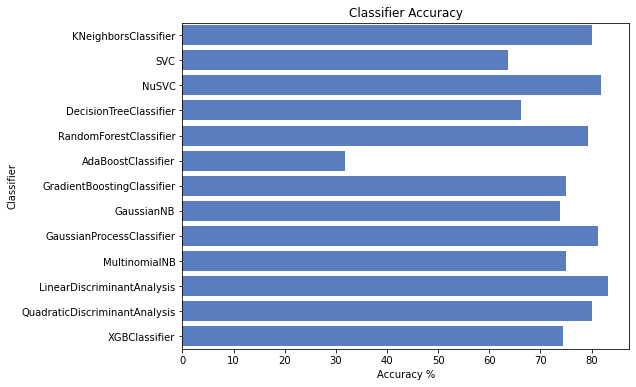

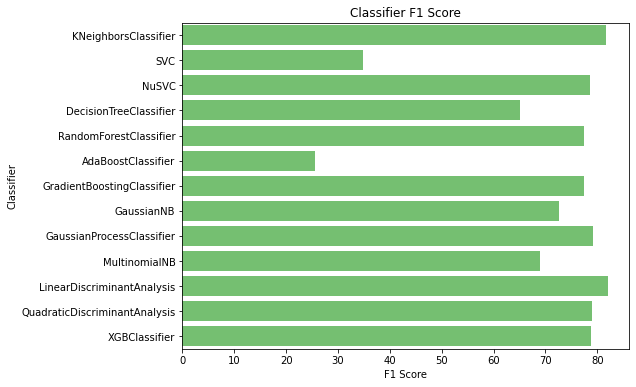

In [49]:
choose_best_clf(X_train, X_test, y_train, y_test)

### pix

In [50]:
X = pix_table_norm.drop(columns=['class'], inplace=False)
y = pix_table_norm['class'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 97.4351%
Precision: 97.4998%
Recall: 97.4375%
SVC
****Results****
Accuracy on test set: 70.6250%
F1: 47.5212%
Precision: 59.4681%
Recall: 52.0515%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NuSVC
****Results****
Accuracy on test set: 93.1250%
F1: 96.3376%
Precision: 96.3989%
Recall: 96.3285%
DecisionTreeClassifier
****Results****
Accuracy on test set: 85.0000%
F1: 83.2303%
Precision: 83.3911%
Recall: 83.2115%
RandomForestClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 96.4647%
Precision: 96.4872%
Recall: 96.4605%
AdaBoostClassifier
****Results****
Accuracy on test set: 77.5000%
F1: 29.6427%
Precision: 32.2184%
Recall: 35.7031%
GradientBoostingClassifier
****Results****
Accuracy on test set: 97.5000%
F1: 95.4289%
Precision: 95.4640%
Recall: 95.4313%
GaussianNB
****Results****
Accuracy on test set: 90.6250%
F1: 90.4907%
Precision: 90.7770%
Recall: 90.3941%
GaussianProcessClassifier
****Results****
Accuracy on test set: 97.5000%
F1: 97.5021%
Precision: 97.5199%
Recall: 97.5007%
MultinomialNB
****Results****
Accuracy on test set: 90.6250%
F1: 90.7297%
Precision: 91.0309%
Recall: 90.7223%
LinearDiscriminantAnalysis
****Results****
Accuracy on test set: 95.6250%
F

/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy on test set: 19.3750%
F1: 19.4863%
Precision: 19.7477%
Recall: 19.5799%
XGBClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 95.0229%
Precision: 95.0917%
Recall: 95.0118%


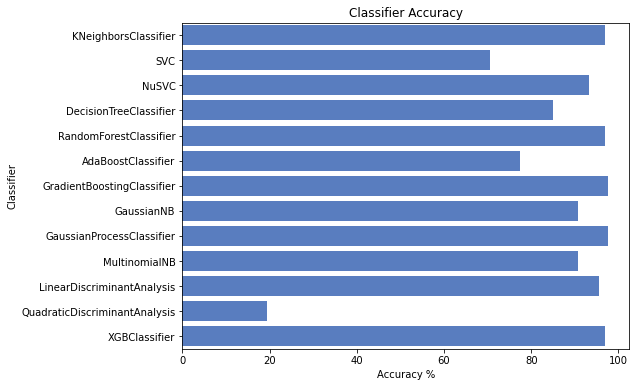

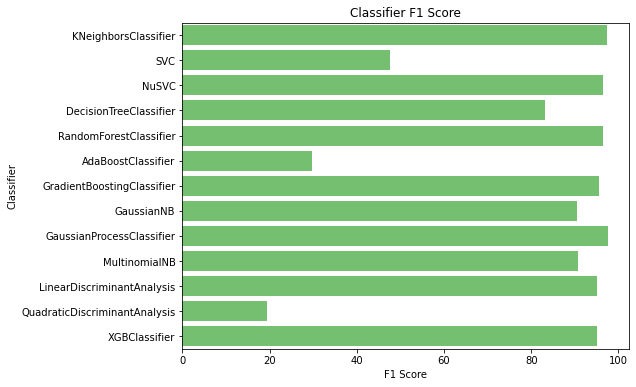

In [51]:
choose_best_clf(X_train, X_test, y_train, y_test)

### Combined dataset

In [52]:
X = combined.drop(columns=['class'], inplace=False)
y = combined['class'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

KNeighborsClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 97.4381%
Precision: 97.4976%
Recall: 97.4136%
SVC
****Results****
Accuracy on test set: 81.2500%
F1: 47.3613%
Precision: 51.4080%
Recall: 51.9497%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NuSVC
****Results****
Accuracy on test set: 97.5000%
F1: 96.7555%
Precision: 96.8054%
Recall: 96.7304%
DecisionTreeClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 90.2885%
Precision: 90.3507%
Recall: 90.2780%
RandomForestClassifier
****Results****
Accuracy on test set: 98.7500%
F1: 98.2742%
Precision: 98.2974%
Recall: 98.2649%
AdaBoostClassifier
****Results****
Accuracy on test set: 18.1250%
F1: 12.2683%
Precision: 20.8412%
Recall: 22.6733%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
****Results****
Accuracy on test set: 97.5000%
F1: 96.4869%
Precision: 96.5867%
Recall: 96.4443%
GaussianNB
****Results****
Accuracy on test set: 97.5000%
F1: 94.2989%
Precision: 94.4536%
Recall: 94.2861%
GaussianProcessClassifier
****Results****
Accuracy on test set: 95.6250%
F1: 97.7005%
Precision: 97.7124%
Recall: 97.6982%
MultinomialNB
****Results****
Accuracy on test set: 94.3750%
F1: 91.5660%
Precision: 91.8253%
Recall: 91.6216%
LinearDiscriminantAnalysis
****Results****
Accuracy on test set: 98.7500%
F1: 97.0558%
Precision: 97.1659%
Recall: 97.0217%
QuadraticDiscriminantAnalysis
****Results****


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy on test set: 20.6250%
F1: 18.5125%
Precision: 19.3923%
Recall: 19.0571%
XGBClassifier
****Results****
Accuracy on test set: 99.3750%
F1: 97.2517%
Precision: 97.2893%
Recall: 97.2431%


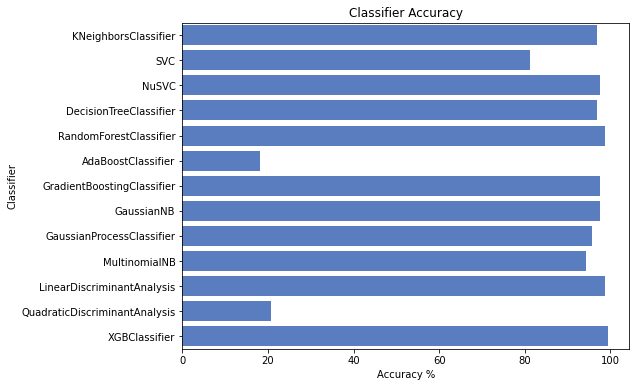

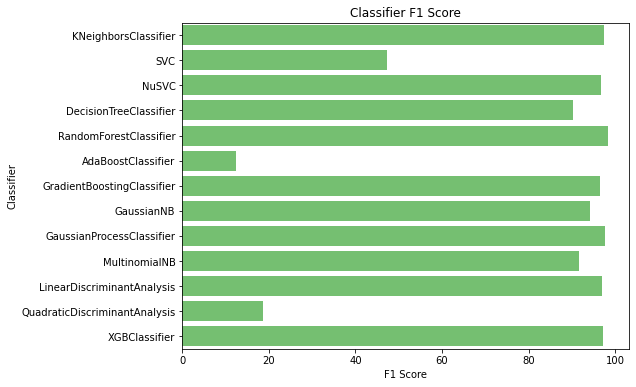

In [53]:
choose_best_clf(X_train, X_test, y_train, y_test)

## Reducing parameters on the whole set

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

In [56]:
d

96

Even though it says ther variance above 95% can be achieved with 96 parameters (originally there are 294),
but from the following graph we can see, that ~95% variance can be achieved with just 90 parameters, which is more than 3 times less than in the original data

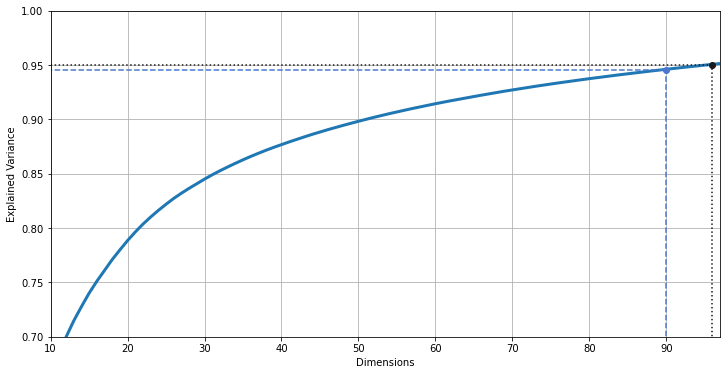

In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(cumsum, linewidth=3)
plt.axis([10, 97, 0.7, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")


plt.plot([90, 90], [0, 0.945], marker='o', color='b', linestyle="--")
plt.plot([0, 90], [0.945, 0.945],color='b', linestyle="--")

plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(4.5, 0.9), xytext=(6, 0.8),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [58]:
pca = PCA(n_components=d)
pca.fit(X)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)


KNeighborsClassifier
****Results****
Accuracy on test set: 96.8750%
F1: 97.5723%
Precision: 97.6230%
Recall: 97.5534%
SVC
****Results****
Accuracy on test set: 85.0000%
F1: 51.2656%
Precision: 71.8647%
Recall: 56.6611%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NuSVC
****Results****
Accuracy on test set: 97.5000%
F1: 96.8858%
Precision: 96.9406%
Recall: 96.8566%
DecisionTreeClassifier
****Results****
Accuracy on test set: 85.0000%
F1: 81.9116%
Precision: 82.0685%
Recall: 81.8607%
RandomForestClassifier
****Results****
Accuracy on test set: 95.6250%
F1: 95.8846%
Precision: 96.0081%
Recall: 95.8632%
AdaBoostClassifier
****Results****
Accuracy on test set: 23.7500%
F1: 26.1723%
Precision: 28.5870%
Recall: 32.3081%


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier
****Results****
Accuracy on test set: 91.8750%
F1: 91.4492%
Precision: 91.5549%
Recall: 91.4155%
GaussianNB
****Results****
Accuracy on test set: 96.8750%
F1: 94.7163%
Precision: 94.9239%
Recall: 94.6560%
GaussianProcessClassifier
****Results****
Accuracy on test set: 95.6250%
F1: 97.6260%
Precision: 97.6381%
Recall: 97.6263%

MultinomialNB cannot be trained
LinearDiscriminantAnalysis
****Results****
Accuracy on test set: 98.1250%
F1: 97.1153%
Precision: 97.1883%
Recall: 97.0893%
QuadraticDiscriminantAnalysis
****Results****


/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Alexey/miniconda3/envs/data_mining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy on test set: 97.5000%
F1: 22.8763%
Precision: 34.8953%
Recall: 28.1153%
XGBClassifier
****Results****
Accuracy on test set: 94.3750%
F1: 94.3166%
Precision: 94.3634%
Recall: 94.2951%


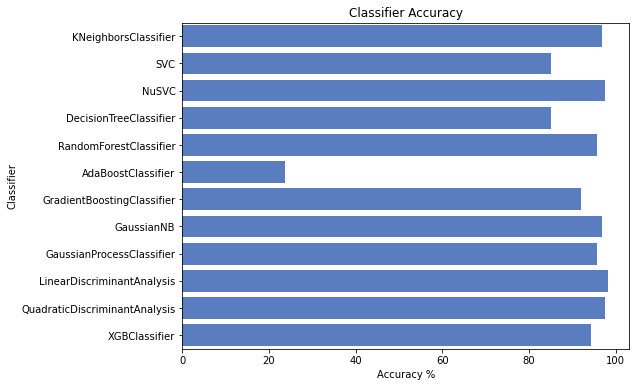

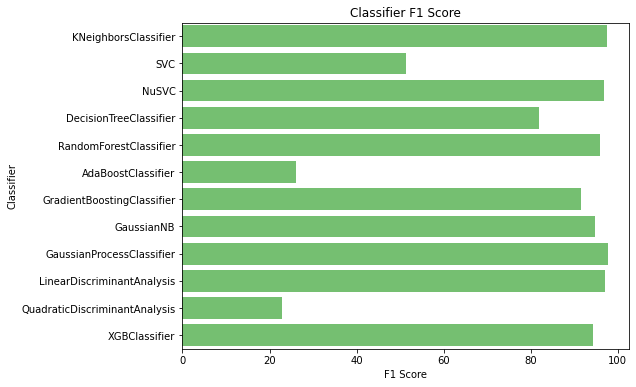

In [59]:
choose_best_clf(X_train_reduced, X_test_reduced, y_train, y_test)

## Ensemble Learning

In [60]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

In [61]:
# classifiers = [('pix_rf', pix_rf_model), ('mor_lda', mor_lda_model), ('zer_knn', zer_knn_model)]
classifiers = [('pix_rf', RandomForestClassifier()), ('mor_lda', LinearDiscriminantAnalysis()), ('zer_knn', KNeighborsClassifier())]

### Stacking

In [62]:
from sklearn.linear_model import LogisticRegression

level1 = LogisticRegression()
# define the stacking ensemble
stacking_clf = StackingClassifier(estimators=classifiers, final_estimator=level1, cv=5)

In [63]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('pix_rf', RandomForestClassifier()),
                               ('mor_lda', LinearDiscriminantAnalysis()),
                               ('zer_knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [64]:
%%time

_, _ = metrics(stacking_clf, X_train, y_train, X_test, y_test)

Accuracy on test set: 99.3750%
F1: 98.4971%
Precision: 98.5291%
Recall: 98.4828%
CPU times: user 53 s, sys: 1.26 s, total: 54.3 s
Wall time: 8.13 s


In [65]:
stacking_clf.fit(X_train_reduced, y_train)

StackingClassifier(cv=5,
                   estimators=[('pix_rf', RandomForestClassifier()),
                               ('mor_lda', LinearDiscriminantAnalysis()),
                               ('zer_knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [66]:
%%time

_, _ = metrics(stacking_clf, X_train_reduced, y_train, X_test_reduced, y_test)

Accuracy on test set: 98.1250%
F1: 98.1367%
Precision: 98.1561%
Recall: 98.1295%
CPU times: user 35.5 s, sys: 1.21 s, total: 36.7 s
Wall time: 8.21 s


### Voting

In [67]:
voting_clf = VotingClassifier(estimators=classifiers, 
                              voting='hard')

In [68]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('pix_rf', RandomForestClassifier()),
                             ('mor_lda', LinearDiscriminantAnalysis()),
                             ('zer_knn', KNeighborsClassifier())])

In [69]:
%%time

_, _= metrics(voting_clf, X_train, y_train, X_test, y_test)

Accuracy on test set: 99.3750%
F1: 98.3621%
Precision: 98.4308%
Recall: 98.3367%
CPU times: user 17.6 s, sys: 707 ms, total: 18.3 s
Wall time: 2.18 s


In [70]:
voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('pix_rf', RandomForestClassifier()),
                             ('mor_lda', LinearDiscriminantAnalysis()),
                             ('zer_knn', KNeighborsClassifier())])

In [71]:
%%time

_, _= metrics(voting_clf, X_train_reduced, y_train, X_test_reduced, y_test)

Accuracy on test set: 97.5000%
F1: 97.3062%
Precision: 97.3936%
Recall: 97.2793%
CPU times: user 12.2 s, sys: 742 ms, total: 13 s
Wall time: 1.89 s


### Bagging

In [72]:
bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=20, bootstrap=True)

In [73]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=20)

In [74]:
%%time

_, _= metrics(bagging_clf, X_train, y_train, X_test, y_test)

Accuracy on test set: 96.8750%
F1: 97.6359%
Precision: 97.6677%
Recall: 97.6244%
CPU times: user 11.4 s, sys: 91.5 ms, total: 11.5 s
Wall time: 11.5 s
